In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import warnings
warnings.simplefilter("ignore")

In [4]:
df = pd.read_csv("train.csv")
df.head()

,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,25629,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,14473,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,23720,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,5843,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,18709,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [4]:
df.columns

Index(['Unnamed: 0', 'Booking_ID', 'no_of_adults', 'no_of_children',
       'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan',
       'required_car_parking_space', 'room_type_reserved', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='object')

In [5]:
df.drop(columns=['Unnamed: 0', 'Booking_ID'], inplace=True)

In [6]:
df.head()
df.shape

(29020, 18)

In [7]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(21359, 18)

In [11]:
df["no_of_adults"].value_counts()

no_of_adults
2    15489
1     3996
3     1748
0      113
4       13
Name: count, dtype: int64

In [12]:
cat_cols = ['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'market_segment_type', 'repeated_guest', 'booking_status']

num_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room','no_of_special_requests']

In [13]:
len(cat_cols)

6

In [14]:
len(num_cols)

11

DATA ANALYSIS

In [15]:
data = df.copy()

In [16]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


Univariate Analysis

In [17]:
def num_plot_dist(df, num_features):
    fig, axes = plt.subplots(len(num_features), 2, figsize=(15, len(num_features)))
    if len(num_features) == 1:
        axes = [axes]

    for i, column in enumerate(num_features):
        sns.histplot(data=df, x=column, ax=axes[i][0], kde=True, palette="Blues")
        axes[i][0].set_title(f"Histogram for {column}")

        sns.boxplot(data=df, x=column, ax=axes[i][1], palette="Blues")
        axes[i][1].set_title(f"Box plot for {column}")

    plt.tight_layout()
    plt.show()

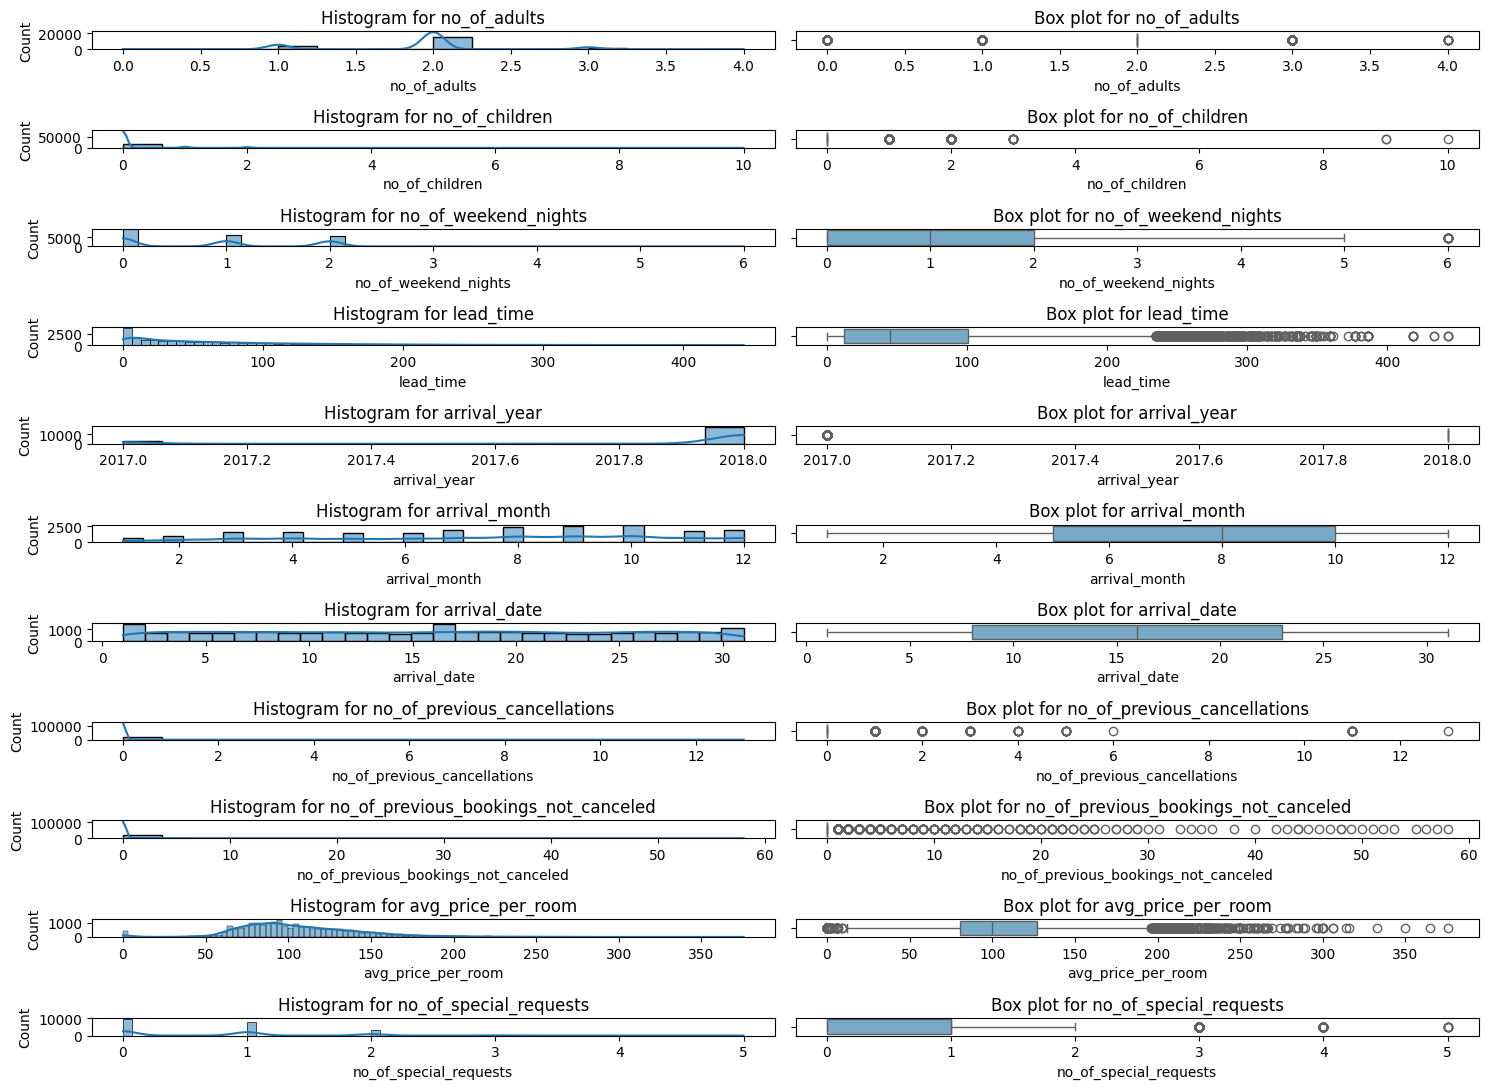

In [19]:
num_plot_dist(data, num_cols)

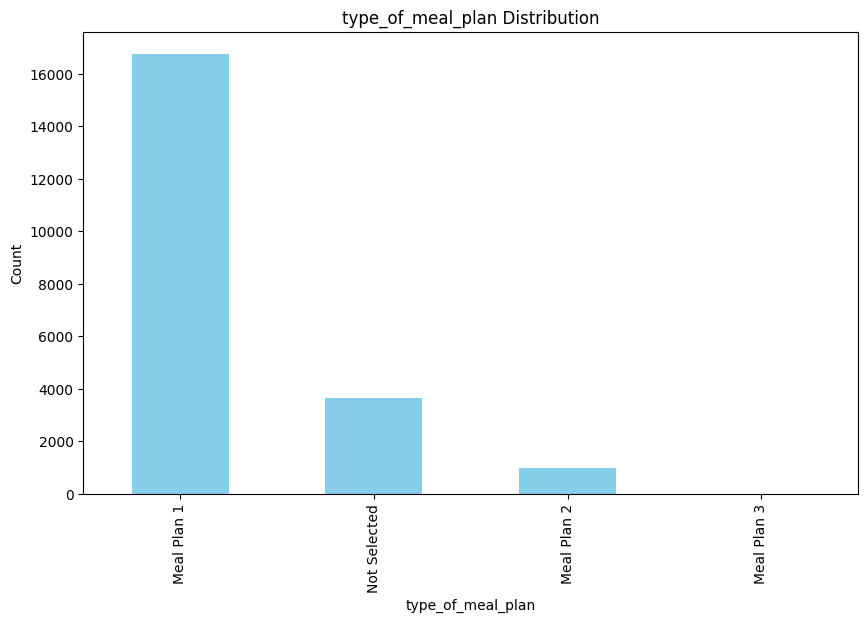

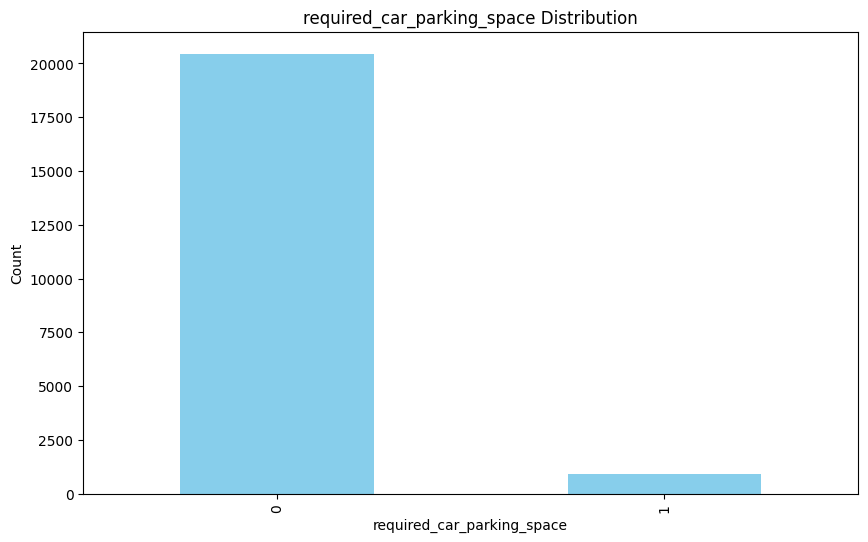

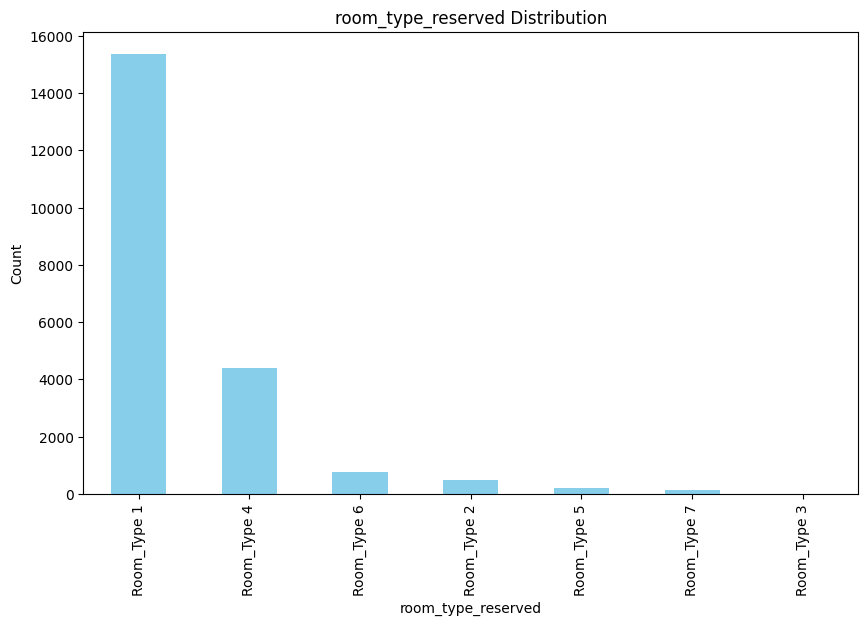

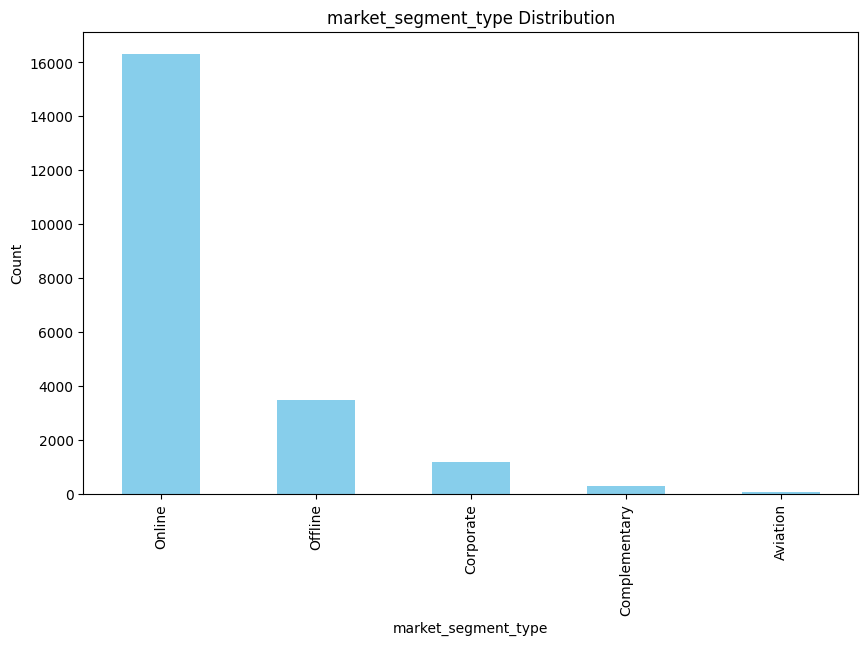

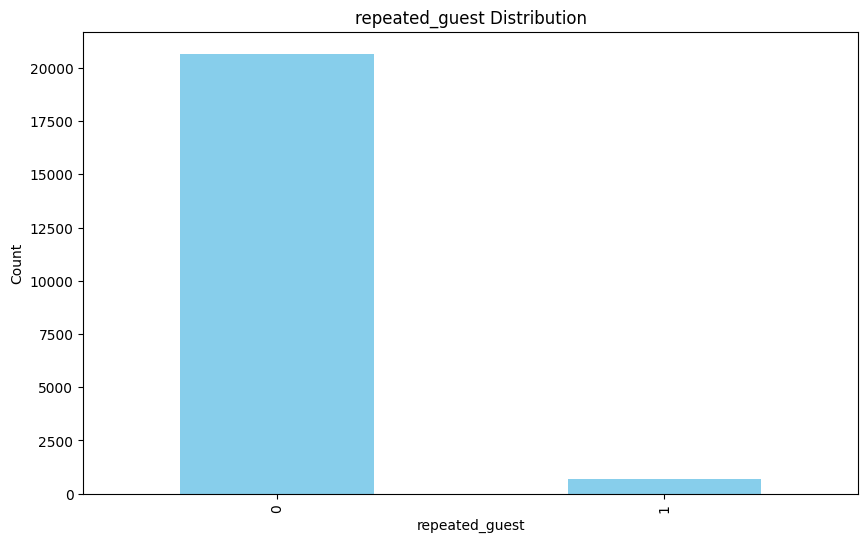

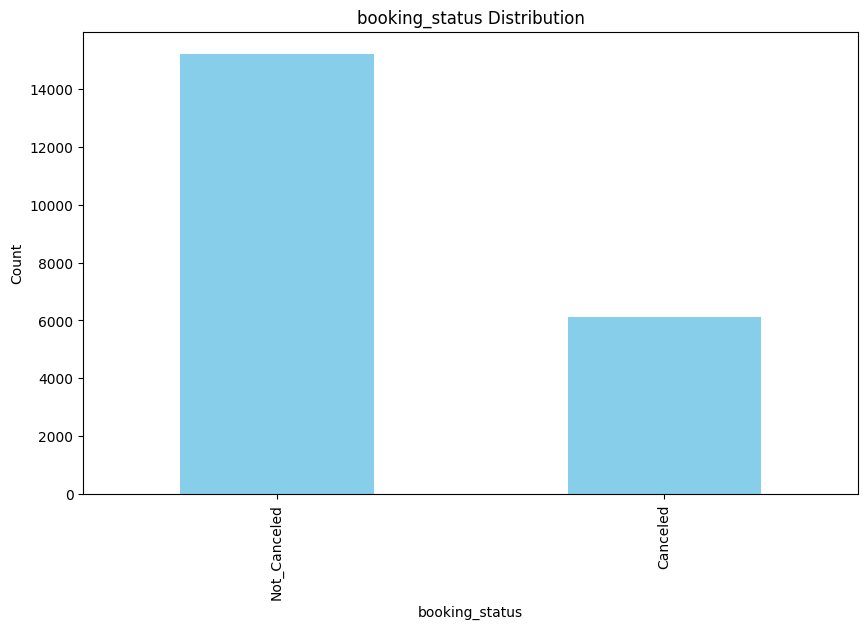

In [18]:
for cat_feature in cat_cols:
    plt.figure(figsize=(10,6))
    data[cat_feature].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f"{cat_feature} Distribution")
    plt.xlabel(cat_feature)
    plt.ylabel("Count")
    plt.show()

Bivariate Analysis

In [19]:
def plot_bivariate_num(df, target, num_features):
    num_plots = len(num_features)
    num_rows = (num_plots+1)//2

    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows*5))
    axes = axes.flatten()

    for i, column in enumerate(num_features):
        sns.boxplot(x=target, y=column, ax=axes[i], data=df, palette="Blues")
        axes[i].set_title(f"{column} VS {target}")

    plt.tight_layout()
    plt.show()


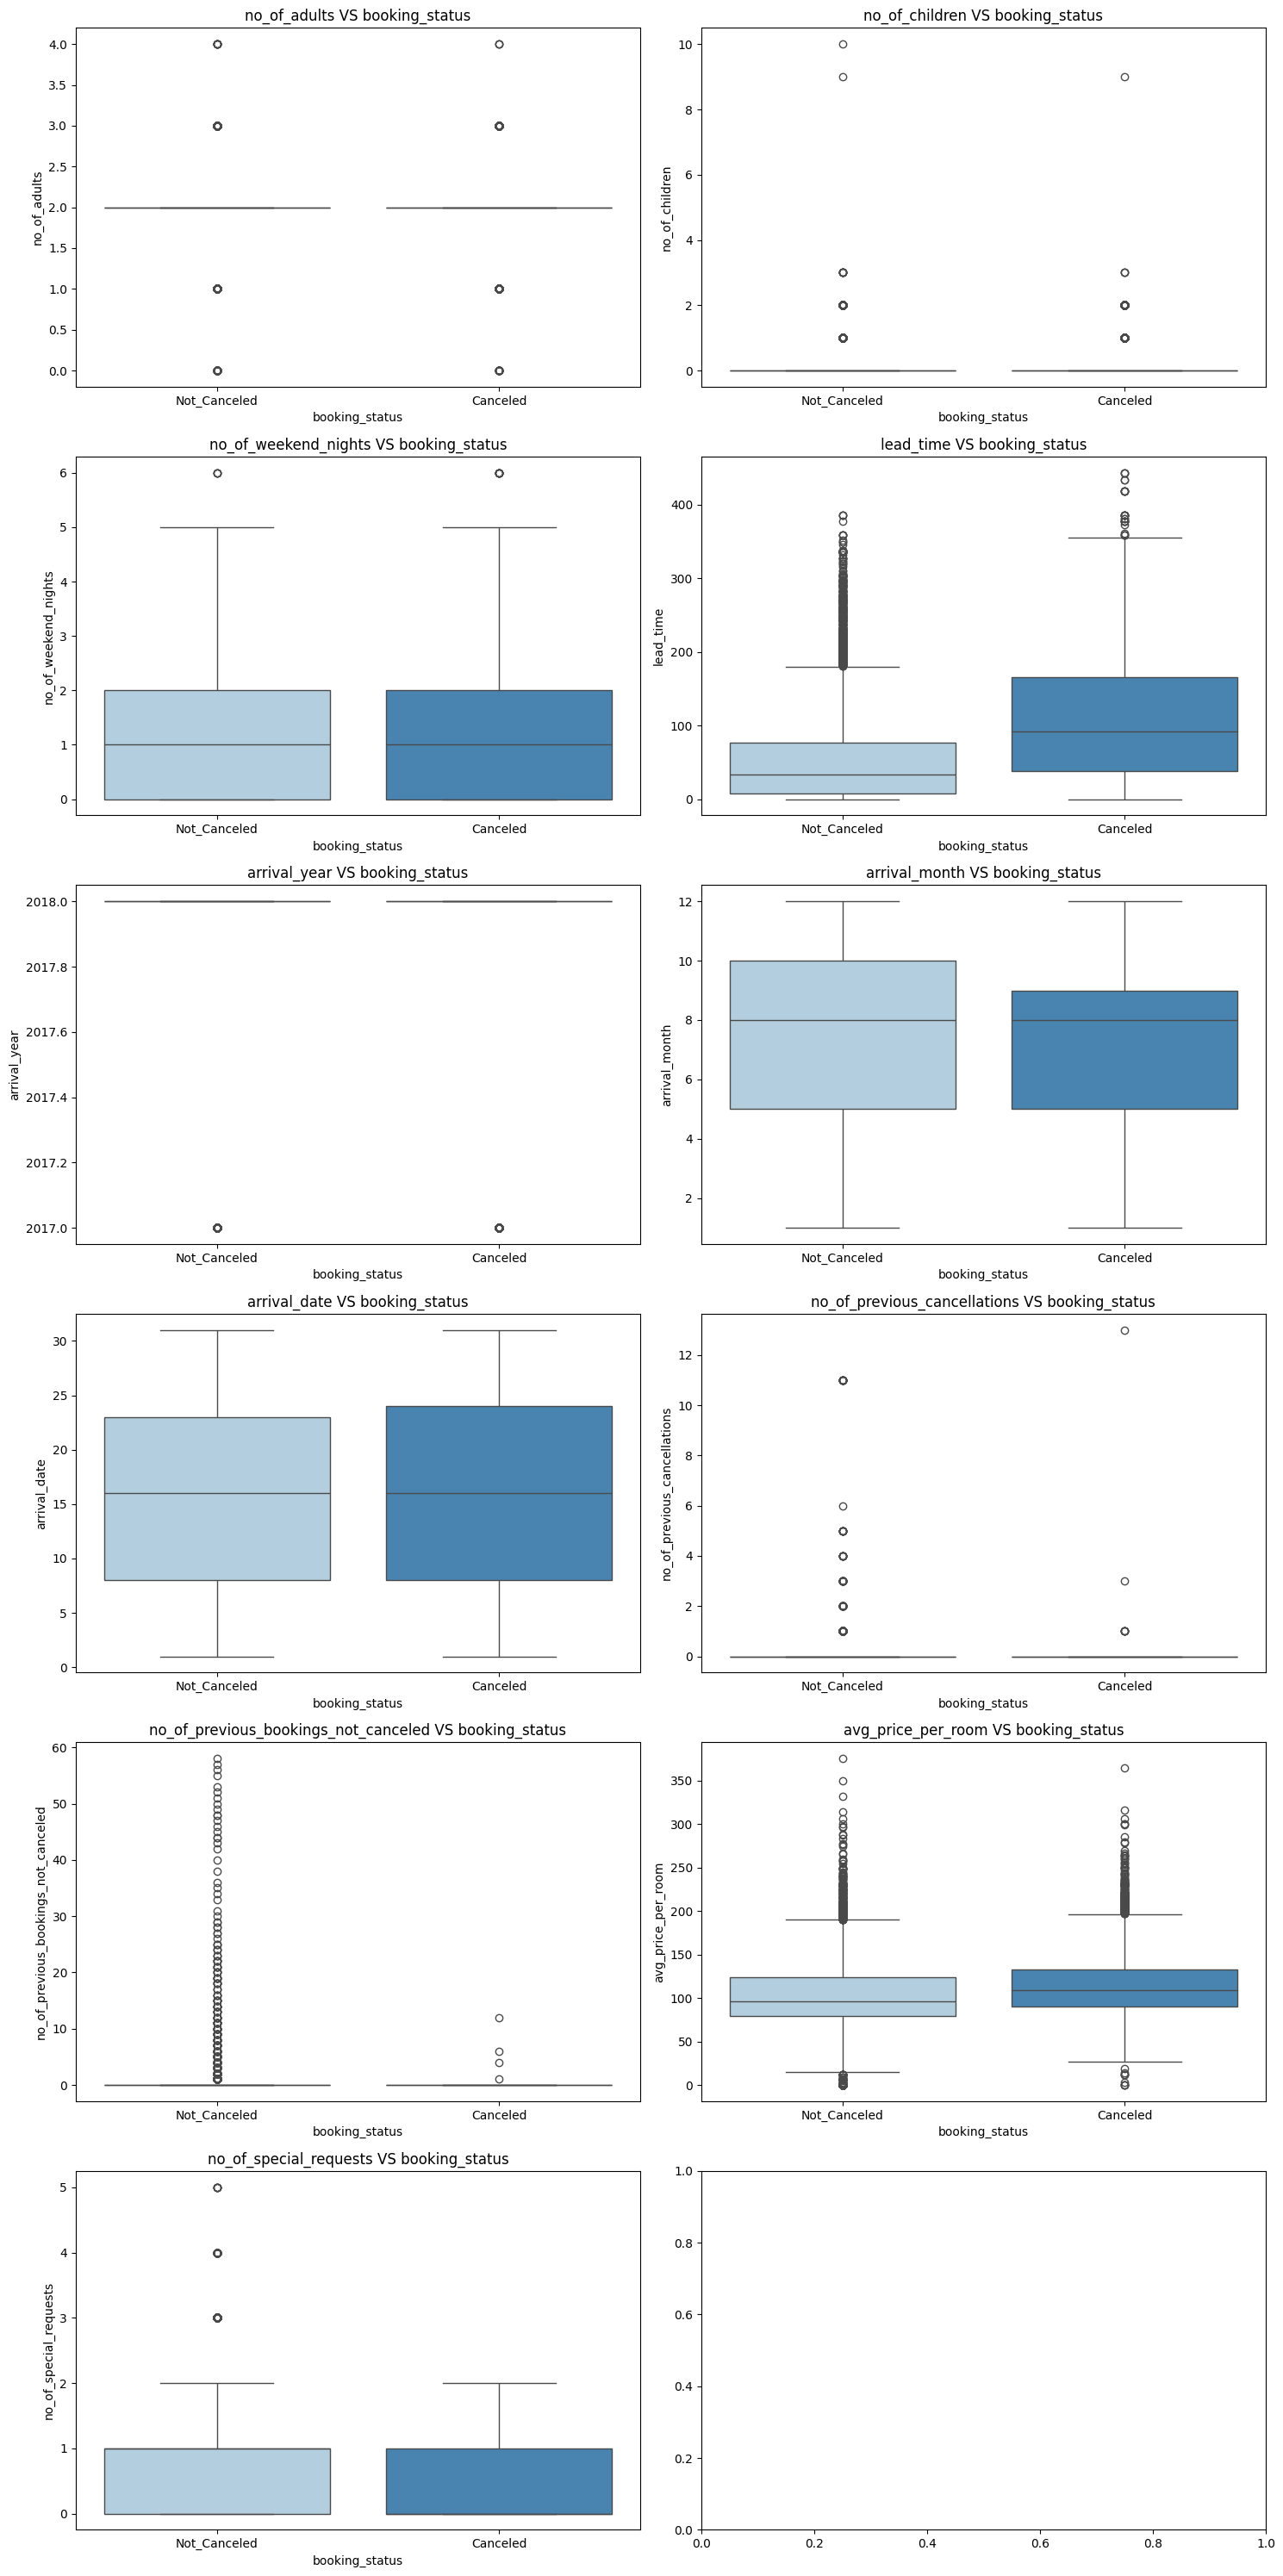

In [22]:
plot_bivariate_num(data, "booking_status", num_cols)

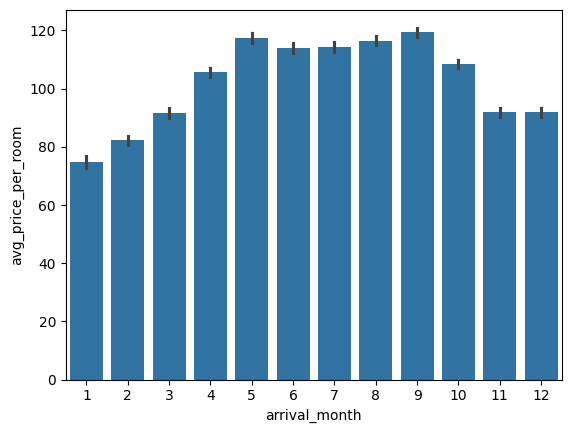

In [23]:
sns.barplot(x='arrival_month', y='avg_price_per_room', data=data)
plt.show()

In [20]:
def plot_bivariate_cat(df, target, cat_features):
    num_features = len(cat_features)
    num_rows = (num_features+1)//2

    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows*5))
    axes = axes.flatten()

    for i, feature in enumerate(cat_features):
        sns.countplot(x=feature, hue=target, data=df, palette="Set2", ax=axes[i])
        axes[i].set_title(f"{feature} VS {target}")
        axes[i].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()


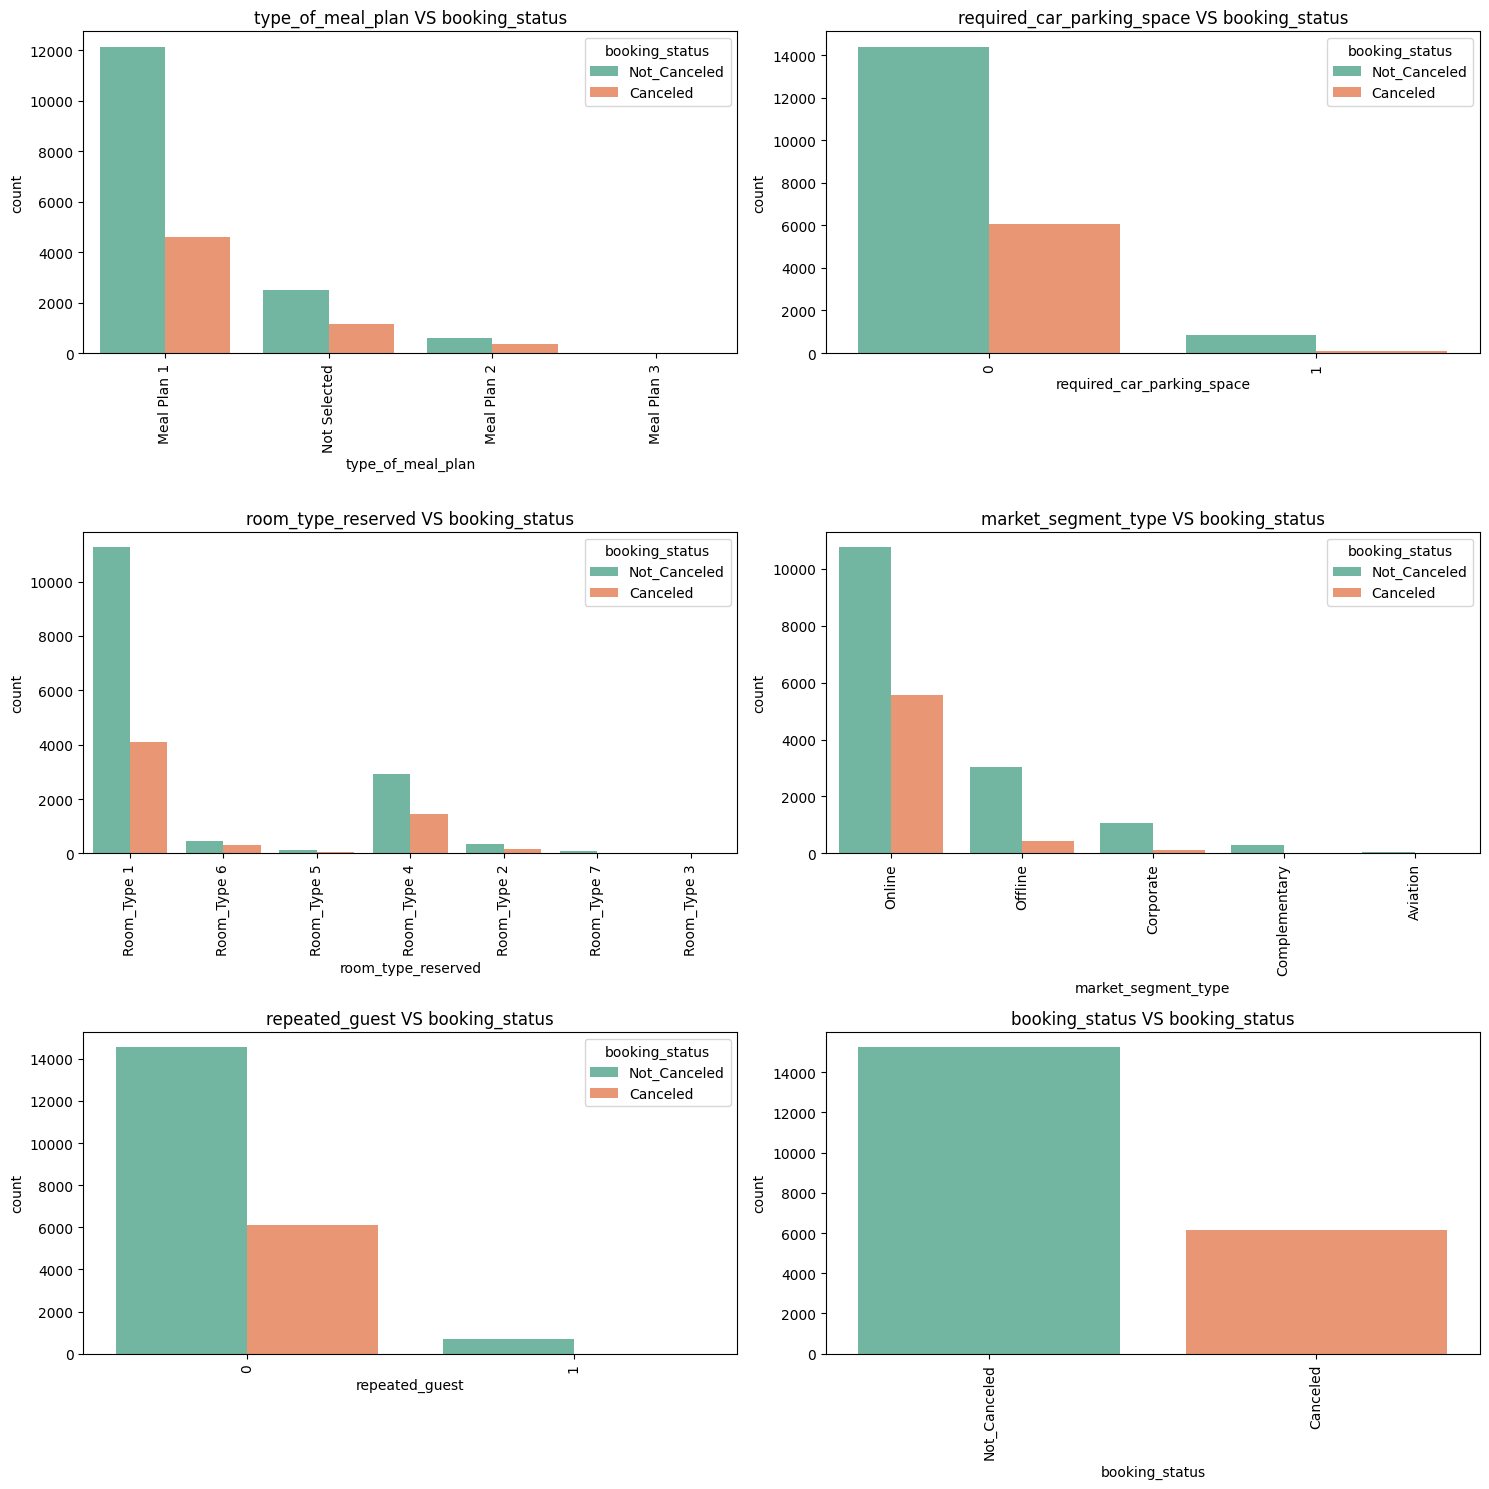

In [25]:
plot_bivariate_cat(data, 'booking_status', cat_cols)

In [ ]:
### DATA PROCESSING

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  object 
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  object 
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

In [22]:
### Label encoding

from sklearn.preprocessing import LabelEncoder


In [23]:
label_encoder = LabelEncoder()

mappings={}

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

    mappings[col] = {label:code for label, code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}
    

In [30]:
mappings

{'type_of_meal_plan': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1),
  np.int64(2): np.int64(2),
  np.int64(3): np.int64(3)},
 'required_car_parking_space': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1)},
 'room_type_reserved': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1),
  np.int64(2): np.int64(2),
  np.int64(3): np.int64(3),
  np.int64(4): np.int64(4),
  np.int64(5): np.int64(5),
  np.int64(6): np.int64(6)},
 'market_segment_type': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1),
  np.int64(2): np.int64(2),
  np.int64(3): np.int64(3),
  np.int64(4): np.int64(4)},
 'repeated_guest': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)},
 'booking_status': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)}}

In [24]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0,0,0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0,0,0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0,0,0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0,0,0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0,0,0,130.00,0,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  int64  
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  int64  
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

In [33]:
### Multicolinearity

In [34]:
%pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB 435.7 kB/s eta 0:00:23
   ---------------------------------------- 0.1/9.8 MB 871.5 kB/s eta 0:00:12
    --------------------------------------- 0.2/9.8 MB 1.8 MB/s eta 0:00:06
   -- ------------------------------------- 0.6/9.8 MB 3.6 MB/s eta 0:00:03
   ------- -------------------------------- 1.8/9.8 MB 7.5 MB/s eta 0:00:02
   ------------ --------------------------- 3.0/9.8 MB 11.3 MB/s eta 0:00:01
   ------------ --------------------------- 3.2/9.8 MB 10.6 MB/s eta 0:00:01
   ------------ --------------------------- 3.2/9.8 MB 10.6 MB/s eta 0:00:01
   ---------------- ----------------------- 4.1/9.8 MB 9.6 MB/s eta 0:00:01
   ------------------ --------------------- 4.5/9.8 MB 9.7 MB/s eta 0:00:01
   ------------------- -------------------- 4.8/9.8 MB 9.2 MB/s eta 0:00:01
   ----------------


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


In [27]:
X = add_constant(df)

vif_data = pd.DataFrame()

vif_data["feature"] = X.columns

In [28]:
vif_data

,feature
0,const
1,no_of_adults
2,no_of_children
3,no_of_weekend_nights
4,no_of_week_nights
5,type_of_meal_plan
6,required_car_parking_space
7,room_type_reserved
8,lead_time
9,arrival_year


In [29]:
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]




In [30]:
vif_data

,feature,VIF
0,const,4.100197e+07
1,no_of_adults,1.341180e+00
2,no_of_children,1.282459e+00
3,no_of_weekend_nights,1.073215e+00
4,no_of_week_nights,1.125260e+00
5,type_of_meal_plan,1.178228e+00
6,required_car_parking_space,1.036105e+00
7,room_type_reserved,1.549859e+00
8,lead_time,1.406287e+00
9,arrival_year,1.288533e+00


In [31]:
corr = df.corr()



<Axes: >

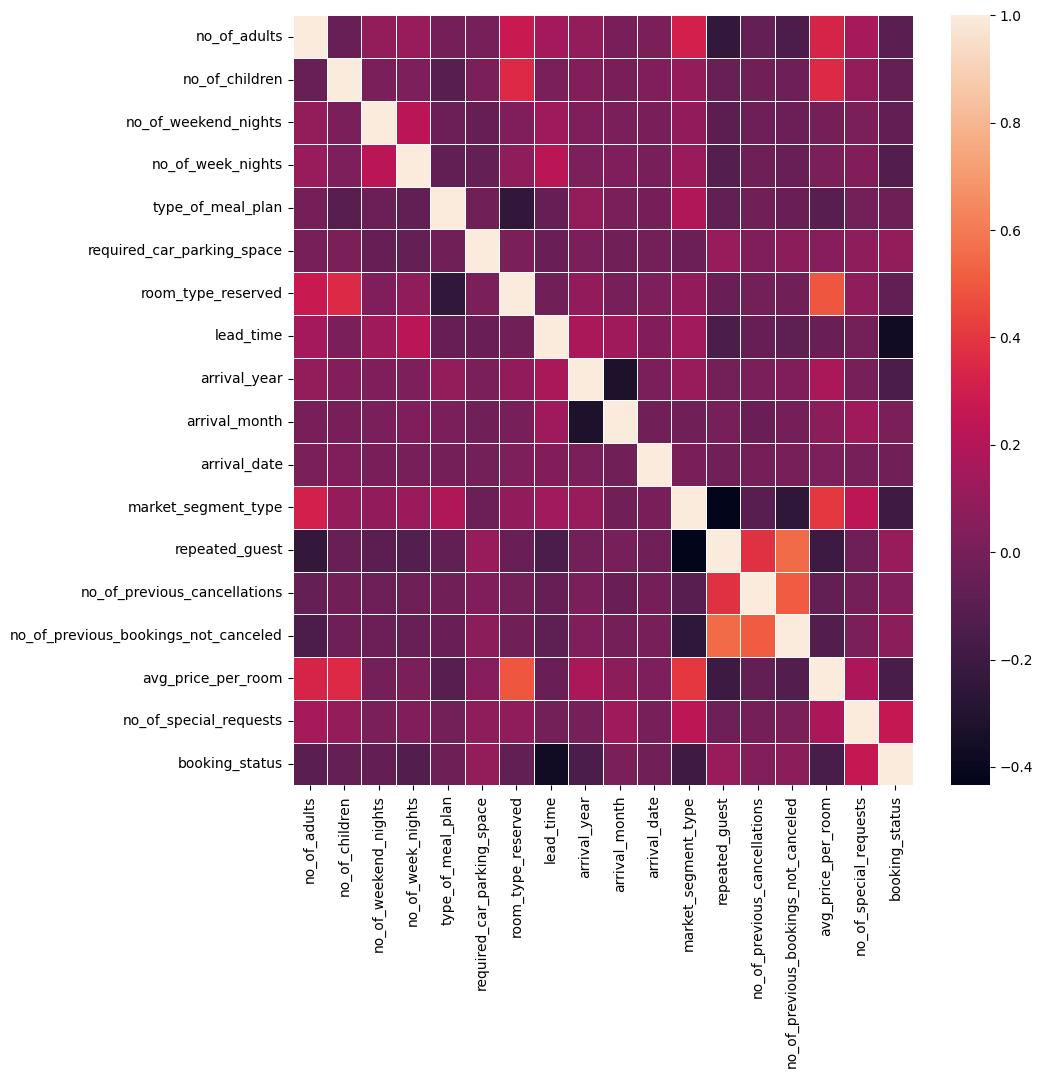

In [32]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, linewidths=0.5)


In [ ]:
### Skewness

In [33]:
skewness = df.skew()

In [34]:
skewness

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            22.001489
no_of_previous_bookings_not_canceled    16.735934
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [35]:
for col in df.columns:
    if skewness[col] > 5:
        df[col] = np.log1p(df[col])


In [ ]:
### Imbalanced data

In [36]:
df["booking_status"].value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [37]:
X=df.drop(columns='booking_status')
y=df["booking_status"]



In [38]:
X.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [53]:
%pip install imbalanced-learn

   ---------------------------------------- 0.0/238.4 kB ? eta -:--:--
   ----- --------------------------------- 30.7/238.4 kB 660.6 kB/s eta 0:00:01
   ------------------------- -------------- 153.6/238.4 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------  235.5/238.4 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------  235.5/238.4 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 238.4/238.4 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
y.value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [40]:
from imblearn.over_sampling import SMOTE

In [41]:
smote = SMOTE(random_state=42)

X_res, y_res = smote.fit_resample(X, y)

In [42]:
y_res.value_counts()

booking_status
1    15231
0    15231
Name: count, dtype: int64

In [43]:
balanced_df = pd.DataFrame(X_res, columns=X.columns)
balanced_df["booking_status"] = y_res

In [44]:
balanced_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0.0,0.0,0.0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0.0,0.0,0.0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0.0,0.0,0.0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0.0,0.0,0.0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0.0,0.0,0.0,130.00,0,0


In [45]:
balanced_df.shape

(30462, 18)

In [46]:
df = balanced_df.copy()

In [47]:
df.shape

(30462, 18)

In [ ]:
### Feature selection

In [48]:
len(df.columns)

18

In [49]:
from sklearn.ensemble import RandomForestClassifier


In [50]:
X = df.drop(columns='booking_status')
y = df["booking_status"]

In [51]:
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

RandomForestClassifier(random_state=42)

In [52]:
feature_importance = model.feature_importances_

In [53]:
feature_importance_df = pd.DataFrame({
    'feature':X.columns,
    'Importance':feature_importance
})

In [54]:
feature_importance_df

,feature,Importance
0,no_of_adults,0.018242
1,no_of_children,0.006775
2,no_of_weekend_nights,0.030316
3,no_of_week_nights,0.044419
4,type_of_meal_plan,0.020648
5,required_car_parking_space,0.011845
6,room_type_reserved,0.020059
7,lead_time,0.260226
8,arrival_year,0.016362
9,arrival_month,0.085296


In [55]:
top_feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

In [56]:
len(df.columns)

18

In [57]:
top_10_features = top_feature_importance_df["feature"].head(10).values

top_10_df = df[top_10_features.tolist() + ["booking_status"]]

In [58]:
top_10_df.head()

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved,booking_status
0,26,0,161.00,10,17,4,1,2,0,0,1
1,98,2,121.50,7,16,4,1,1,0,0,1
2,433,0,70.00,9,8,3,3,0,0,0,0
3,195,0,72.25,8,8,3,5,2,0,0,1
4,188,0,130.00,6,15,3,2,0,0,0,0


In [59]:
len(top_10_df.columns)

11

In [60]:
df = top_10_df.copy()

### Model Selection

In [79]:
%pip install xgboost lightgbm

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 1.3 MB/s eta 0:01:58
   ---------------------------------------- 0.1/150.0 MB 1.3 MB/s eta 0:01:55
   ---------------------------------------- 0.3/150.0 MB 2.0 MB/s eta 0:01:17
   ---------------------------------------- 0.8/150.0 MB 4.3 MB/s eta 0:00:35
   ---------------------------------------- 1.7/150.0 MB 7.3 MB/s eta 0:00:21
    --------------------------------------- 2.3/150.0 MB 8.5 MB/s eta 0:00:18
    --------------------------------------- 2.8/150.0 MB 8.9 MB/s eta 0:00:17
    --------------------------------------- 3.2/150.0 MB 9.4 MB/s eta 0:00:16
    --------------------------------------- 3.2/150.0 MB 9.4 MB/s eta 0:00:16
   - -------------------------------------- 4.4/150.0 MB 9.9 MB/s eta 0:00:15
   - -------------------------------------- 4.4/150.0 MB 9.9 MB/s eta 0:00:15
   - -------------------------------------- 5.0/150.0 MB 9.3 MB/s eta 0


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   -------- ------------------------------- 33.1/150.0 MB 2.8 MB/s eta 0:00:42
   -------- ------------------------------- 33.2/150.0 MB 2.8 MB/s eta 0:00:42
   -------- ------------------------------- 33.3/150.0 MB 2.8 MB/s eta 0:00:42
   -------- ------------------------------- 33.4/150.0 MB 2.8 MB/s eta 0:00:42
   -------- ------------------------------- 33.5/150.0 MB 2.8 MB/s eta 0:00:42
   -------- ------------------------------- 33.6/150.0 MB 2.8 MB/s eta 0:00:42
   --------- ------------------------------ 33.8/150.0 MB 2.8 MB/s eta 0:00:42
   --------- ------------------------------ 33.9/150.0 MB 2.8 MB/s eta 0:00:42
   --------- ------------------------------ 34.0/150.0 MB 2.8 MB/s eta 0:00:42
   --------- ------------------------------ 34.1/150.0 MB 2.7 MB/s eta 0:00:43
   --------- ------------------------------ 34.2/150.0 MB 2.7 MB/s eta 0:00:43
   --------- ------------------------------ 34.3/150.0 MB 2.7 MB/s eta 0:00:43
   --------- ------------------------------ 34.5/150

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score



In [62]:
X = df.drop(columns='booking_status')
y=df["booking_status"]

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
classifiers = {
    "RandomForest" : RandomForestClassifier(random_state=42),
    "LogisticRegression" : LogisticRegression(random_state=42),
    "GradientBoosting" : GradientBoostingClassifier(random_state=42),
    "Support Vector Classifier" : SVC(random_state=42),
    "Decision Tree" : DecisionTreeClassifier(random_state=42),
    "KNN" : KNeighborsClassifier(),
    "Naive Bayes" : GaussianNB(),
    "XGBoost" : XGBClassifier(random_state=42),
    "AdaBoost" : AdaBoostClassifier(random_state=42),
    "LGBM" : LGBMClassifier(random_state=42)
}

In [65]:
metrics = {
    "Model" : [],
    "Accuracy" : [],
    "Precision" : [],
    "Recall" : [],
    "F1 Score" : []
}

In [66]:
for model_name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 Score"].append(f1)

[LightGBM] [Info] Number of positive: 12161, number of negative: 12208
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002934 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 601
[LightGBM] [Info] Number of data points in the train set: 24369, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499036 -> initscore=-0.003857
[LightGBM] [Info] Start training from score -0.003857


In [67]:
metrics_df = pd.DataFrame(metrics)

In [68]:
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,RandomForest,0.891679,0.892508,0.892508,0.892508
1,LogisticRegression,0.774331,0.802787,0.731922,0.765718
2,GradientBoosting,0.837190,0.821473,0.864821,0.842590
3,Support Vector Classifier,0.720335,0.729657,0.706840,0.718068
4,Decision Tree,0.840801,0.850000,0.830619,0.840198
5,KNN,0.779419,0.856612,0.675244,0.755191
6,Naive Bayes,0.773346,0.803232,0.728664,0.764133
7,XGBoost,0.870343,0.866324,0.878176,0.872210
8,AdaBoost,0.804202,0.821294,0.781433,0.800868
9,LGBM,0.866732,0.851494,0.890879,0.870742


Top 3 models here are: RandomForest, XGBoost, LGBM

### TRAIN THE RandomForest Model

In [69]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


In [70]:
X = df.drop(columns='booking_status')
y=df["booking_status"]

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
rf = RandomForestClassifier(random_state=42)

In [73]:
params_dist = {
    'n_estimators' : randint(100,500),
    'max_depth' : randint(10, 50),
    'min_samples_split' : randint(2, 10),
    'min_samples_leaf' : randint(1, 5),
    'bootstrap' : [True, False]
}

In [74]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=params_dist,
    n_iter=5,
    cv=5,
    verbose=2,
    random_state=42,
    scoring='accuracy'
)

In [75]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   9.2s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   8.1s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   8.1s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   8.2s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   8.1s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=  15.0s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=  17.8s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=  15.0s
[CV]

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001AF1C030920>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001AF292DD0D0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001AF292DD6D0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001AF1B22A240>},
                   random_state=42, scoring='accuracy', verbose=2)

In [76]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 33,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 408}

In [77]:
best_rf_model = random_search.best_estimator_

In [78]:
y_pred = best_rf_model.predict(X_test)

In [79]:
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

In [80]:
accuracy

0.8921713441654358

In [81]:
precision, recall, f1

(0.8898222940226171, 0.8970684039087948, 0.8934306569343066)

### Save this model

In [82]:
import joblib

In [83]:
joblib.dump(best_rf_model, "random_forest.pkl")

['random_forest.pkl']

In [84]:
loaded_model = joblib.load("random_forest.pkl")

In [85]:
X_train[0:1]

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved
4157,190,1,93.5,9,8,4,5,2,0,0


In [88]:
new_data = np.array([190, 1, 93.5, 9, 8, 4, 5, 2, 0, 0]).reshape(1, -1)

In [89]:
predictions = loaded_model.predict(new_data)

In [90]:
predictions

array([1])